# Tutorial 1

## Exercice 1

### a) Chargement des données

In [1]:
import os
import pandas as pd

datasets = []
for filename in os.listdir("./2nd_test"):
    dataset=pd.read_csv(os.path.join("./2nd_test", filename), sep='\t', names=['Bearing 1','Bearing 2','Bearing 3','Bearing 4'])
    dataset.index = [filename + "." + str(int(488.28*i)).zfill(7) for i in range(20480)]
    dataset.index = pd.to_datetime(dataset.index, format='%Y.%m.%d.%H.%M.%S.%f')
    datasets.append(dataset)

print(datasets[0].head())

                               Bearing 1  Bearing 2  Bearing 3  Bearing 4
2004-02-12 10:32:39.000000000     -0.049     -0.071     -0.132     -0.010
2004-02-12 10:32:39.000048800     -0.042     -0.073     -0.007     -0.105
2004-02-12 10:32:39.000097600      0.015      0.000      0.007      0.000
2004-02-12 10:32:39.000146400     -0.051      0.020     -0.002      0.100
2004-02-12 10:32:39.000195300     -0.107      0.010      0.127      0.054


### b) Affichage des enregistrements 100 et 750

<AxesSubplot: >

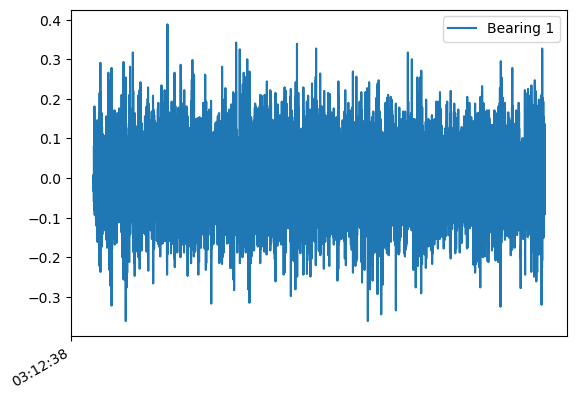

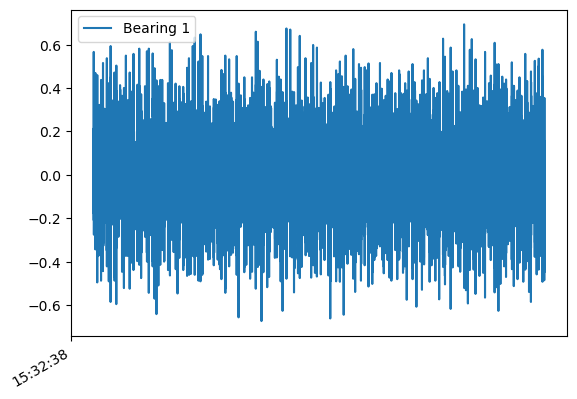

In [2]:
import matplotlib.pyplot as plt

datasets[100].plot(y=["Bearing 1"])
datasets[750].plot(y=["Bearing 1"])

### c) Comparaison visuelle des deux signaux

On remarque très nettement une augmentation de l'amplitude du signal du capteur n°1. On en conclut qu'une nouvelle vibration plus forte a commencé à se faire ressentir dans le premier accéléromètre.

### d) Histogrammes

<AxesSubplot: ylabel='Frequency'>

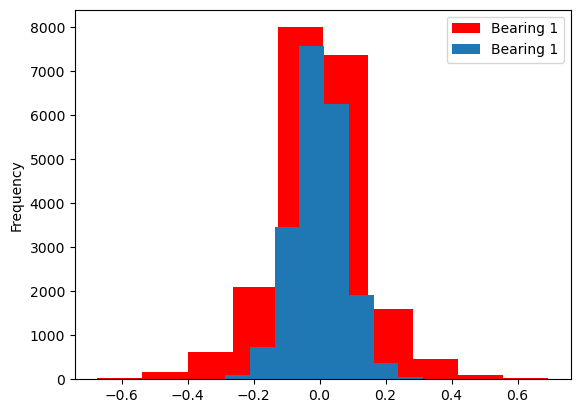

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
datasets[750].plot(y=["Bearing 1"], kind="hist", ax=ax, color='red')
datasets[100].plot(y=["Bearing 1"], kind="hist", ax=ax)

On remarque immédiattement que l'histogramme de l'enregistrement 750 est plus large et d'amplitude plus élevée, confirmant qu'une forte vibration plus ample a commencé à se faire ressentir.

### e)  Cascade des 986 signaux

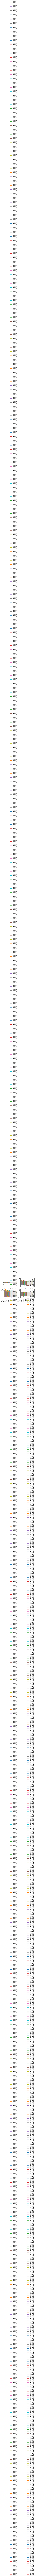

In [4]:
fig = plt.figure()
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

for dataset in datasets:
    dataset.plot(y=["Bearing 1"], ax=ax)
    dataset.plot(y=["Bearing 2"], ax=bx)
    dataset.plot(y=["Bearing 3"], ax=cx)
    dataset.plot(y=["Bearing 4"], ax=dx)
plt.show()

#### a. Évolution de la vibration

#### b. Conclusion

## Exercice 2

### a) Implémentation des fonctions

In [ ]:
def peak_to_peak(signal):
    return max(signal)-min(signal)

def rms(signal):
    return sqrt(1/len(signal) * sum([(x-mean(signal))**2 for x in signal]))

def kurtosis(signal):
    sigma = sqrt()
    return 1/len(signal) * sum([((x-mean(signal))/sigma)**4 for x in signal])

def crest_factor(signal):
    return max(signal)/rms(signal)

def skewness(signal):
    sigma = 1
    return 1/len(signal) * sum([((x-mean(signal))/sigma)**3 for x in signal])